# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income= pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print("df_hh_income: ", df_hh_income.shape)
print("df_pct_poverty: ", df_pct_poverty.shape)
print("df_pct_completed_hs: ", df_pct_completed_hs.shape)
print("df_share_race_city: ", df_share_race_city.shape)
print("df_fatalities: ", df_fatalities.shape)

df_hh_income:  (29322, 3)
df_pct_poverty:  (29329, 3)
df_pct_completed_hs:  (29329, 3)
df_share_race_city:  (29268, 7)
df_fatalities:  (2535, 14)


In [ ]:
df_hh_income


,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [ ]:
df_pct_poverty


,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_completed_hs


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_share_race_city


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
print("df_hh_income: ", df_hh_income.columns)
print("df_pct_poverty: ", df_pct_poverty.columns)
print("df_pct_completed_hs: ", df_pct_completed_hs.columns)
print("df_share_race_city: ", df_share_race_city.columns)
print("df_fatalities: ", df_fatalities.columns)

df_hh_income:  Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty:  Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs:  Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city:  Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities:  Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
print(f'Any NaN values? {df_hh_income.isna().values.any()}')
print(f'Any NaN values? {df_pct_poverty.isna().values.any()}')
print(f'Any NaN values? {df_pct_completed_hs.isna().values.any()}')
print(f'Any NaN values? {df_share_race_city.isna().values.any()}')
print(f'Any NaN values? {df_fatalities.isna().values.any()}')

Any NaN values? True
Any NaN values? False
Any NaN values? False
Any NaN values? False
Any NaN values? True


In [ ]:
print(f'Any duplicates? {df_hh_income.duplicated().values.any()}')
print(f'Any duplicates? {df_pct_poverty.duplicated().values.any()}')
print(f'Any duplicates? {df_pct_completed_hs.duplicated().values.any()}')
print(f'Any duplicates? {df_share_race_city.duplicated().values.any()}')
print(f'Any duplicates? {df_fatalities.duplicated().values.any()}')

Any duplicates? False
Any duplicates? False
Any duplicates? False
Any duplicates? False
Any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.isnull().any()


,0
Geographic Area,False
City,False
Median Income,True


In [ ]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)


In [ ]:
df_hh_income.isnull().any()


,0
Geographic Area,False
City,False
Median Income,False


In [ ]:
df_pct_poverty.isnull().any()


,0
Geographic Area,False
City,False
poverty_rate,False


In [ ]:
df_pct_completed_hs.isnull().any()


,0
Geographic Area,False
City,False
percent_completed_hs,False


In [ ]:
df_share_race_city.isnull().any()


,0
Geographic area,False
City,False
share_white,False
share_black,False
share_native_american,False
share_asian,False
share_hispanic,False


In [ ]:
df_fatalities.isnull().any()


,0
id,False
name,False
date,False
manner_of_death,False
armed,True
age,True
gender,False
race,True
city,False
state,False


In [ ]:
df_fatalities['armed'].fillna('Unknown', inplace=True)

df_fatalities['age'].fillna(df_fatalities['age'].median(), inplace=True)

df_fatalities['race'].fillna('Unknown', inplace=True)

df_fatalities['flee'].fillna('Other', inplace=True)


<ipython-input-21-68f422fbb205>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fatalities['armed'].fillna('Unknown', inplace=True)
<ipython-input-21-68f422fbb205>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
print("Missing values in df_hh_income:")
print(df_hh_income.isnull().sum())

print("\nMissing values in df_pct_poverty:")
print(df_pct_poverty.isnull().sum())

print("\nMissing values in df_pct_completed_hs:")
print(df_pct_completed_hs.isnull().sum())

print("\nMissing values in df_share_race_city:")
print(df_share_race_city.isnull().sum())

print("\nMissing values in df_fatalities:")
print(df_fatalities.isnull().sum())

Missing values in df_hh_income:
Geographic Area    0
City               0
Median Income      0
dtype: int64

Missing values in df_pct_poverty:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in df_share_race_city:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in df_fatalities:
id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate'] != '-']
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

<ipython-input-25-fc38e2491070>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])


In [ ]:
df_pct_poverty.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


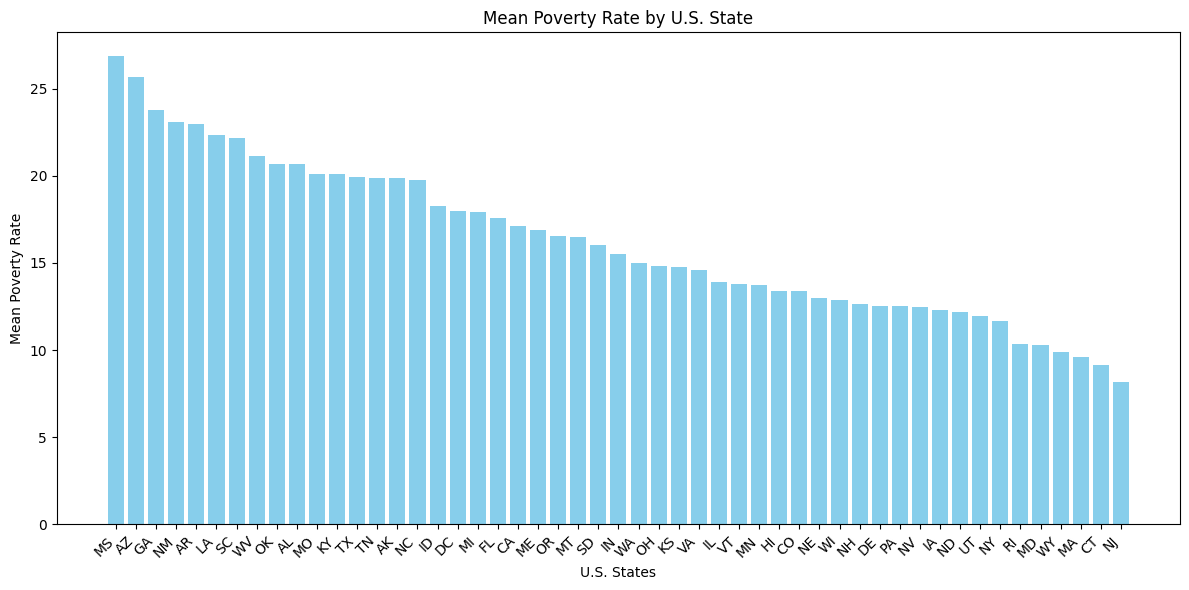

In [ ]:
import matplotlib.pyplot as plt

# Let's group by state and calculate the mean poverty rate for each state
state_poverty_mean = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sorting the data by poverty rate for better visualization
state_poverty_mean = state_poverty_mean.sort_values(by='poverty_rate', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(state_poverty_mean['Geographic Area'], state_poverty_mean['poverty_rate'], color='skyblue')
plt.xlabel('U.S. States')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Identify the state with the highest and lowest poverty rates
highest_poverty_state = state_poverty_mean.iloc[0]['Geographic Area']
lowest_poverty_state = state_poverty_mean.iloc[-1]['Geographic Area']

print(f"Highest poverty rate: {highest_poverty_state}")
print(f"Lowest poverty rate: {lowest_poverty_state}")

Highest poverty rate: MS
Lowest poverty rate: NJ


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

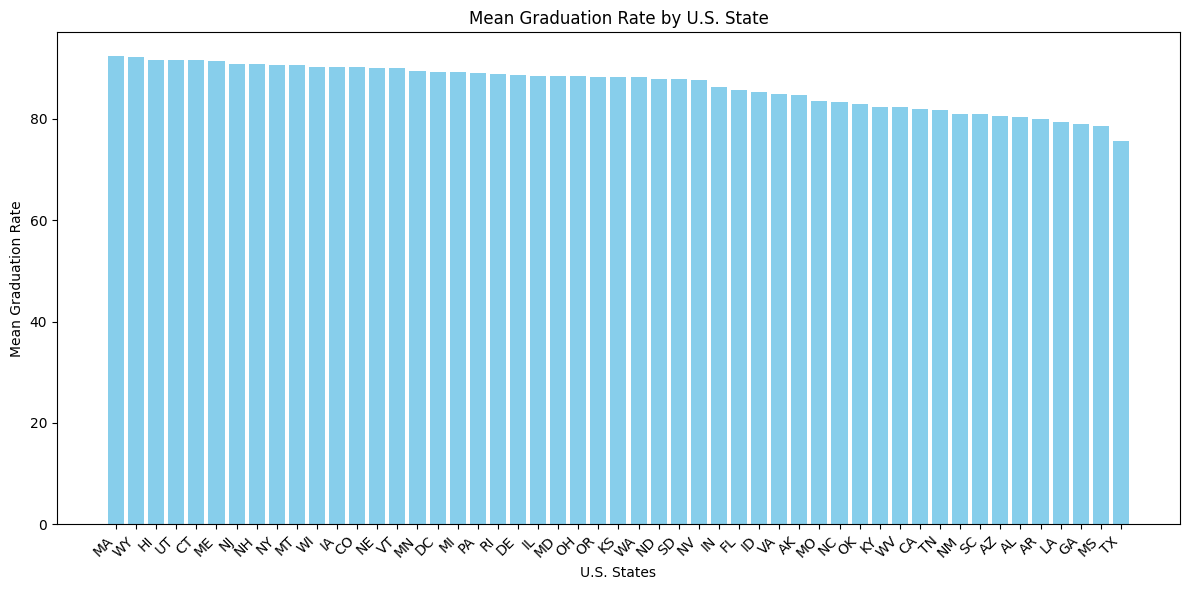

Highest Graduation rate: MA
Lowest Graduation rate: TX


In [ ]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

state_graduation_mean = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

state_graduation_mean = state_graduation_mean.sort_values(by='percent_completed_hs', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_graduation_mean['Geographic Area'], state_graduation_mean['percent_completed_hs'], color='skyblue')
plt.xlabel('U.S. States')
plt.ylabel('Mean Graduation Rate')
plt.title('Mean Graduation Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

plt.show()

highest_graduation_state = state_graduation_mean.iloc[0]['Geographic Area']
lowest_graduation_state = state_graduation_mean.iloc[-1]['Geographic Area']


print(f"Highest Graduation rate: {highest_graduation_state}")
print(f"Lowest Graduation rate: {lowest_graduation_state}")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merged_df = pd.merge(state_poverty_mean, state_graduation_mean, on=['Geographic Area'], how='inner')


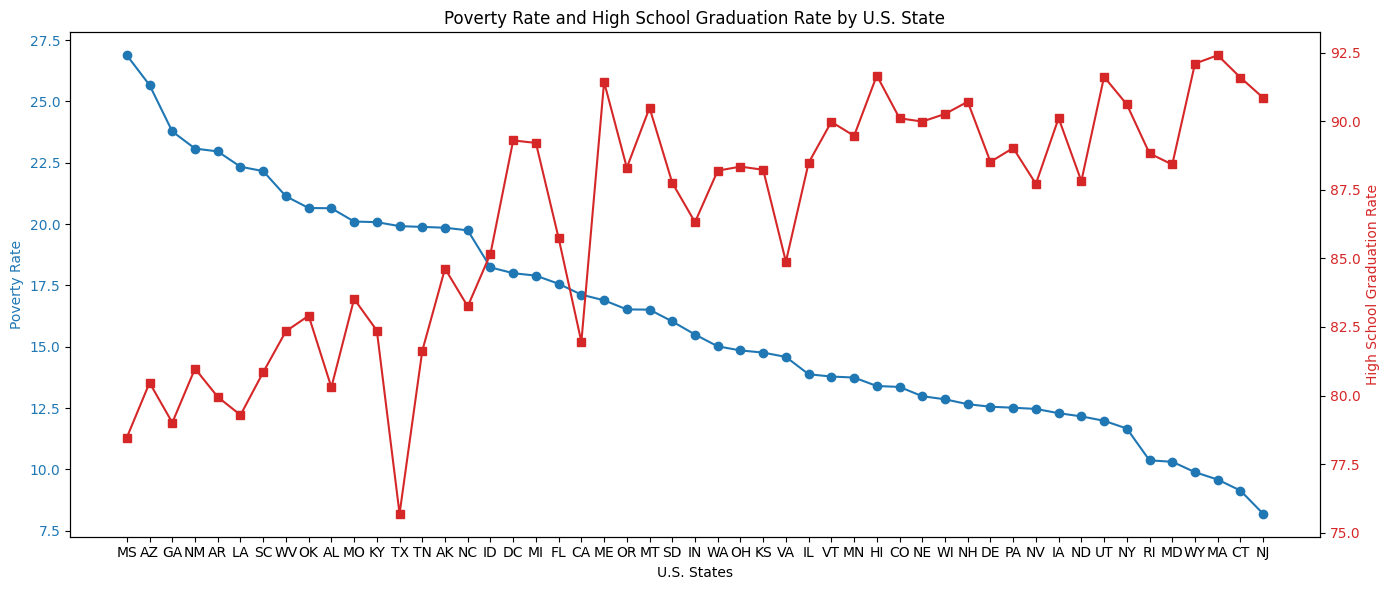

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('U.S. States')
ax1.set_ylabel('Poverty Rate', color=color)
ax1.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('High School Graduation Rate', color=color)
ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Poverty Rate and High School Graduation Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

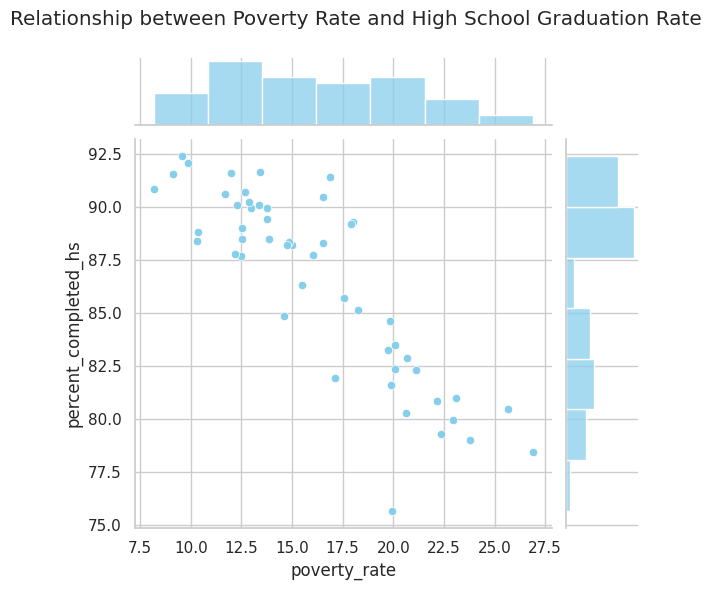

In [ ]:
import seaborn as sns

# Using Seaborn jointplot with scatter plot and KDE
sns.set(style="whitegrid")
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, kind='scatter', color='skyblue')

# Title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Poverty Rate and High School Graduation Rate')

# Display the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

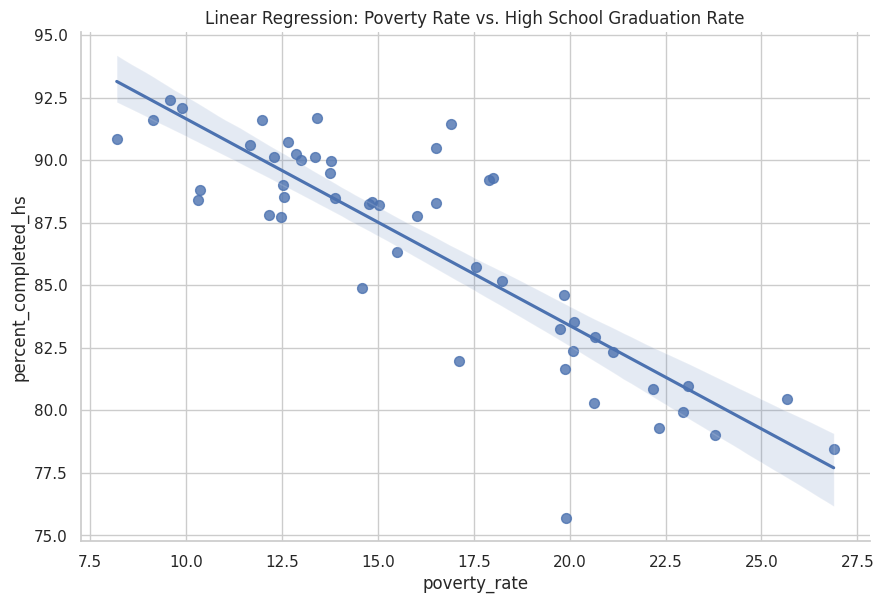

In [ ]:
sns.set(style="whitegrid")
g = sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, height=6, aspect=1.5, scatter_kws={'s': 50})

plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate')

plt.show()

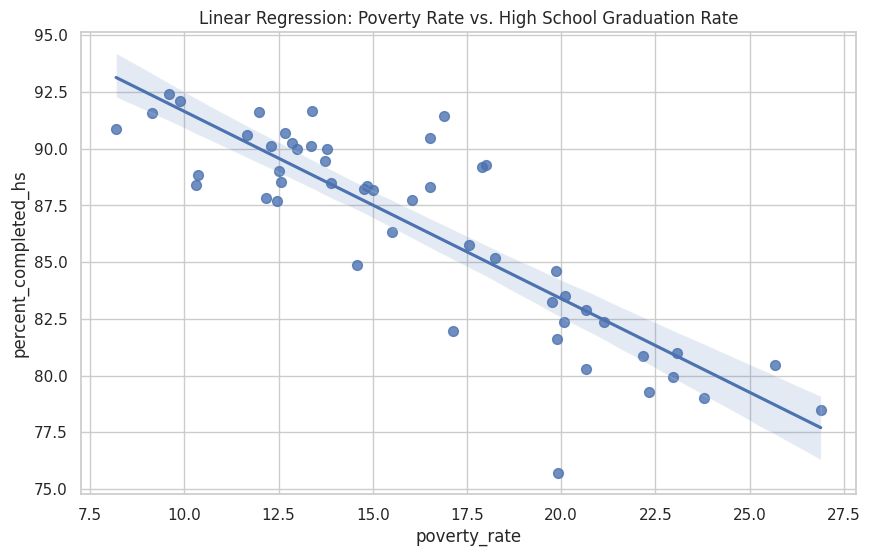

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, scatter_kws={'s': 50})

plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate')

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
columns_to_convert = df_share_race_city.columns[2:]
df_share_race_city[columns_to_convert] = df_share_race_city[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df_share_race_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


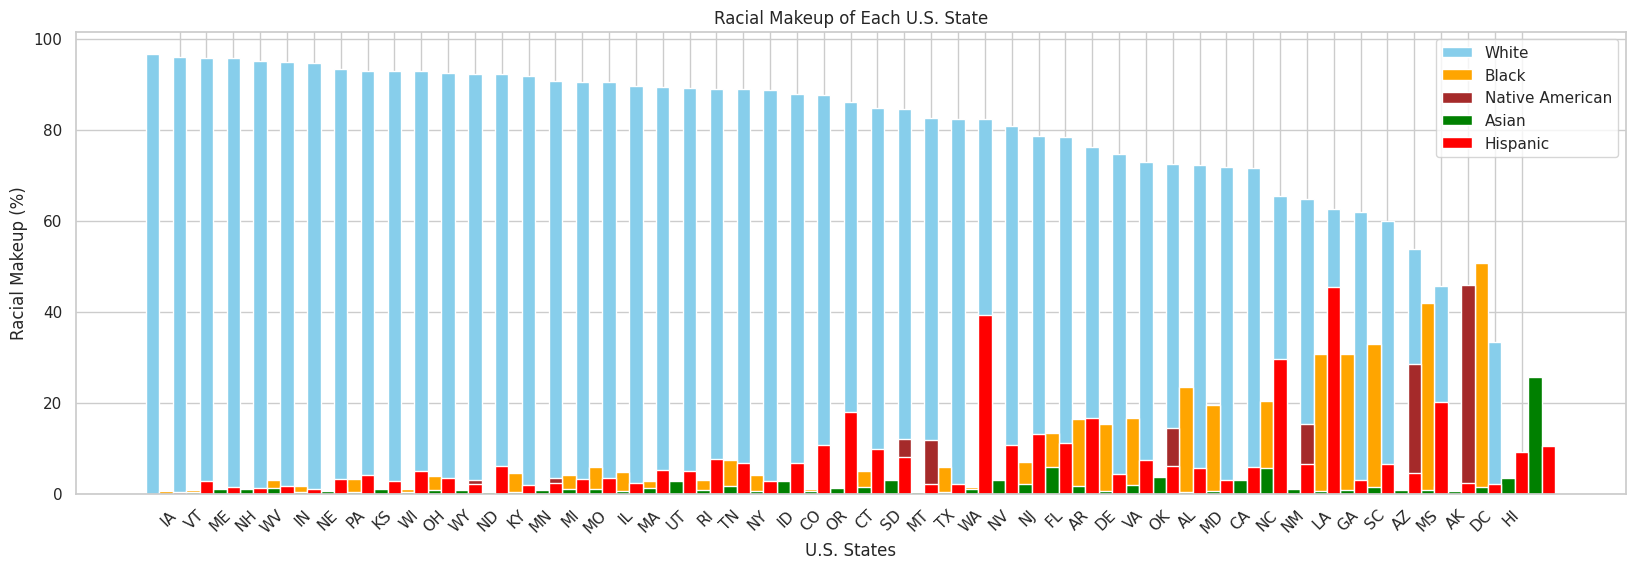

In [ ]:
state_race_mean = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index()

state_race_mean = state_race_mean.sort_values(by='share_white', ascending=False)

bar_width = 0.5
index = np.arange(len(state_race_mean))

plt.figure(figsize=(20, 6))

plt.bar(index - 2 * bar_width, state_race_mean['share_white'], width=bar_width, label='White', color='skyblue')

plt.bar(index - bar_width, state_race_mean['share_black'], width=bar_width, label='Black', color='orange')

plt.bar(index, state_race_mean['share_native_american'], width=bar_width, label='Native American', color='brown')

plt.bar(index + bar_width, state_race_mean['share_asian'], width=bar_width, label='Asian', color='green')

plt.bar(index + 2 * bar_width, state_race_mean['share_hispanic'], width=bar_width, label='Hispanic', color='red')

plt.xlabel('U.S. States')
plt.ylabel('Racial Makeup (%)')
plt.title('Racial Makeup of Each U.S. State')
plt.xticks(index, state_race_mean['Geographic area'], rotation=45, ha='right')
plt.legend()

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
fatalities_by_race = df_fatalities['race'].value_counts()

In [ ]:
fatalities_by_race


,count
race,
W,1201
B,618
H,423
Unknown,195
A,39
N,31
O,28


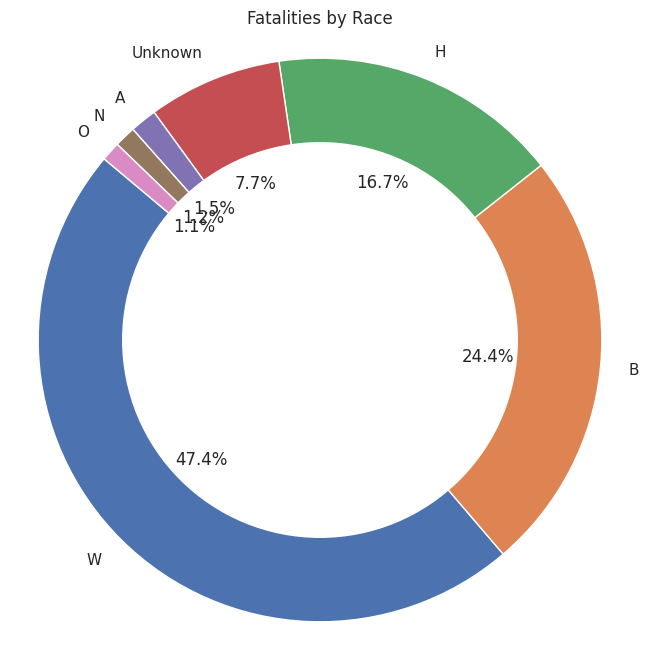

In [ ]:
# Plotting the donut chart
plt.figure(figsize=(8, 8))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = fatalities_by_race.index
sizes = fatalities_by_race.values

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Adding a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Fatalities by Race')

# Display the plot
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
deaths_by_gender = df_fatalities['gender'].value_counts()

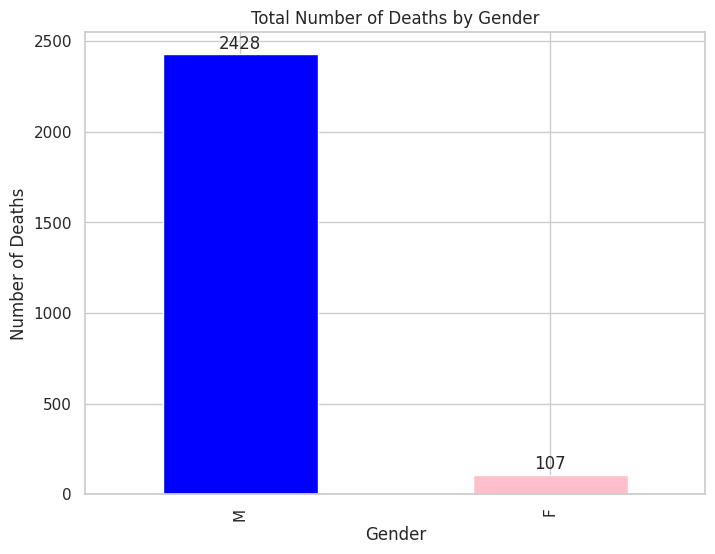

In [ ]:
plt.figure(figsize=(8, 6))

deaths_by_gender.plot(kind='bar', color=['blue', 'pink'])

plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Gender')

for index, value in enumerate(deaths_by_gender):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
manner_of_death = df_fatalities[['manner_of_death', 'gender']].groupby('gender')['manner_of_death'].value_counts()

manner_of_death_pivot = manner_of_death.unstack()

<Figure size 1000x600 with 0 Axes>

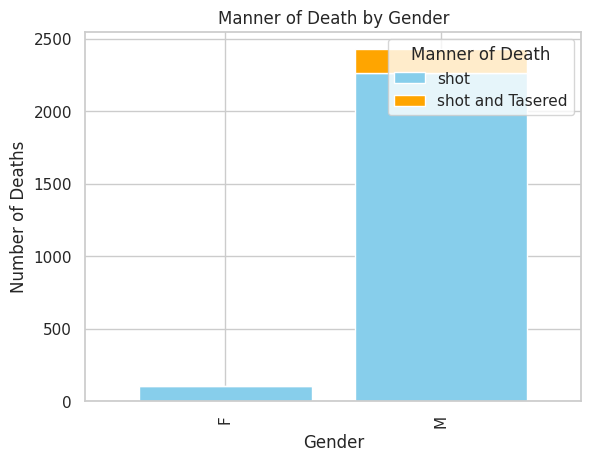

In [ ]:
plt.figure(figsize=(10, 6))

manner_of_death_pivot.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], width=0.8)

plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Manner of Death by Gender')

plt.legend(title='Manner of Death', loc='upper right')

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities_armed = df_fatalities["armed"].value_counts().reset_index()
df_fatalities_armed

,armed,count
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
...,...,...
64,straight edge razor,1
65,baseball bat and fireplace poker,1
66,bean-bag gun,1
67,chain,1


In [ ]:
df_fatalities_armed = df_fatalities["armed"].value_counts().reset_index()
# Rename the 'index' column to 'weapon'
df_fatalities_armed.columns = ['weapon', 'count']

bar = px.bar(
    x=df_fatalities_armed['weapon'],  # Use 'weapon' as the x-axis data
    y=df_fatalities_armed['count'],  # Use 'count' as the y-axis data
    title="Count of Deaths by Weapon",
    hover_name=df_fatalities_armed['weapon'],  # Use 'weapon' for hover data
    color=df_fatalities_armed['count'],  # Use 'count' for color mapping
    color_continuous_scale="Agsunset"
)

bar.update_layout(
    xaxis_title="Weapon",
    yaxis_title="Deaths",
    coloraxis_showscale=False
)

bar.show()

In [ ]:

armed_deaths = df_fatalities[df_fatalities["armed"] != "unarmed"]["armed"].count()
unarmed_deaths = df_fatalities[df_fatalities["armed"] == "unarmed"]["armed"].count()

print(f"Percentage Armed: {armed_deaths / (armed_deaths + unarmed_deaths) * 100}")
print(f"Percentage Unarmed: {unarmed_deaths / (armed_deaths + unarmed_deaths) * 100}")

Percentage Armed: 93.25443786982248
Percentage Unarmed: 6.7455621301775155


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
print("Percentage of people killed under the age of 25: ", df_fatalities[df_fatalities['age'] < 25].shape[0] / df_fatalities.shape[0] * 100, "%")


Percentage of people killed under the age of 25:  17.75147928994083 %


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

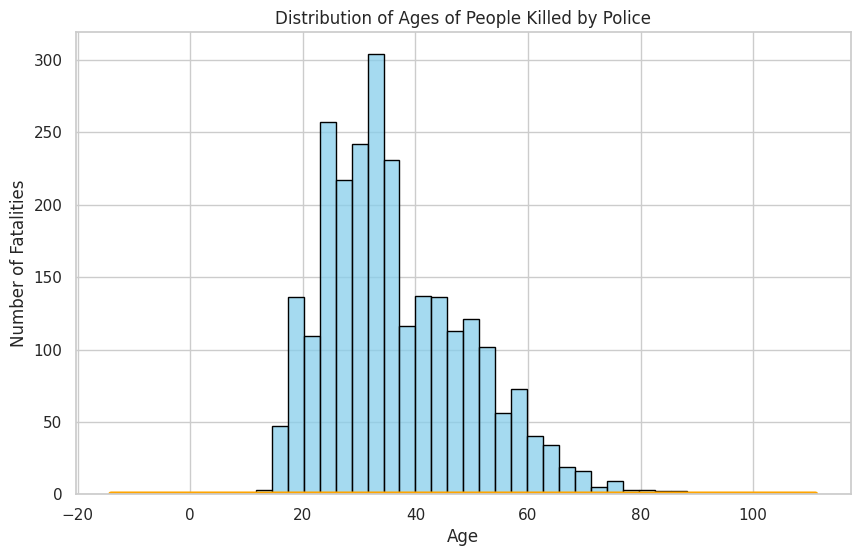

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df_fatalities['age'], bins=30, kde=False, color='skyblue', edgecolor='black')

sns.kdeplot(df_fatalities['age'], bw_adjust=2.5, color='orange', linewidth=4)

plt.xlabel('Age')
plt.ylabel('Number of Fatalities')
plt.title('Distribution of Ages of People Killed by Police')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

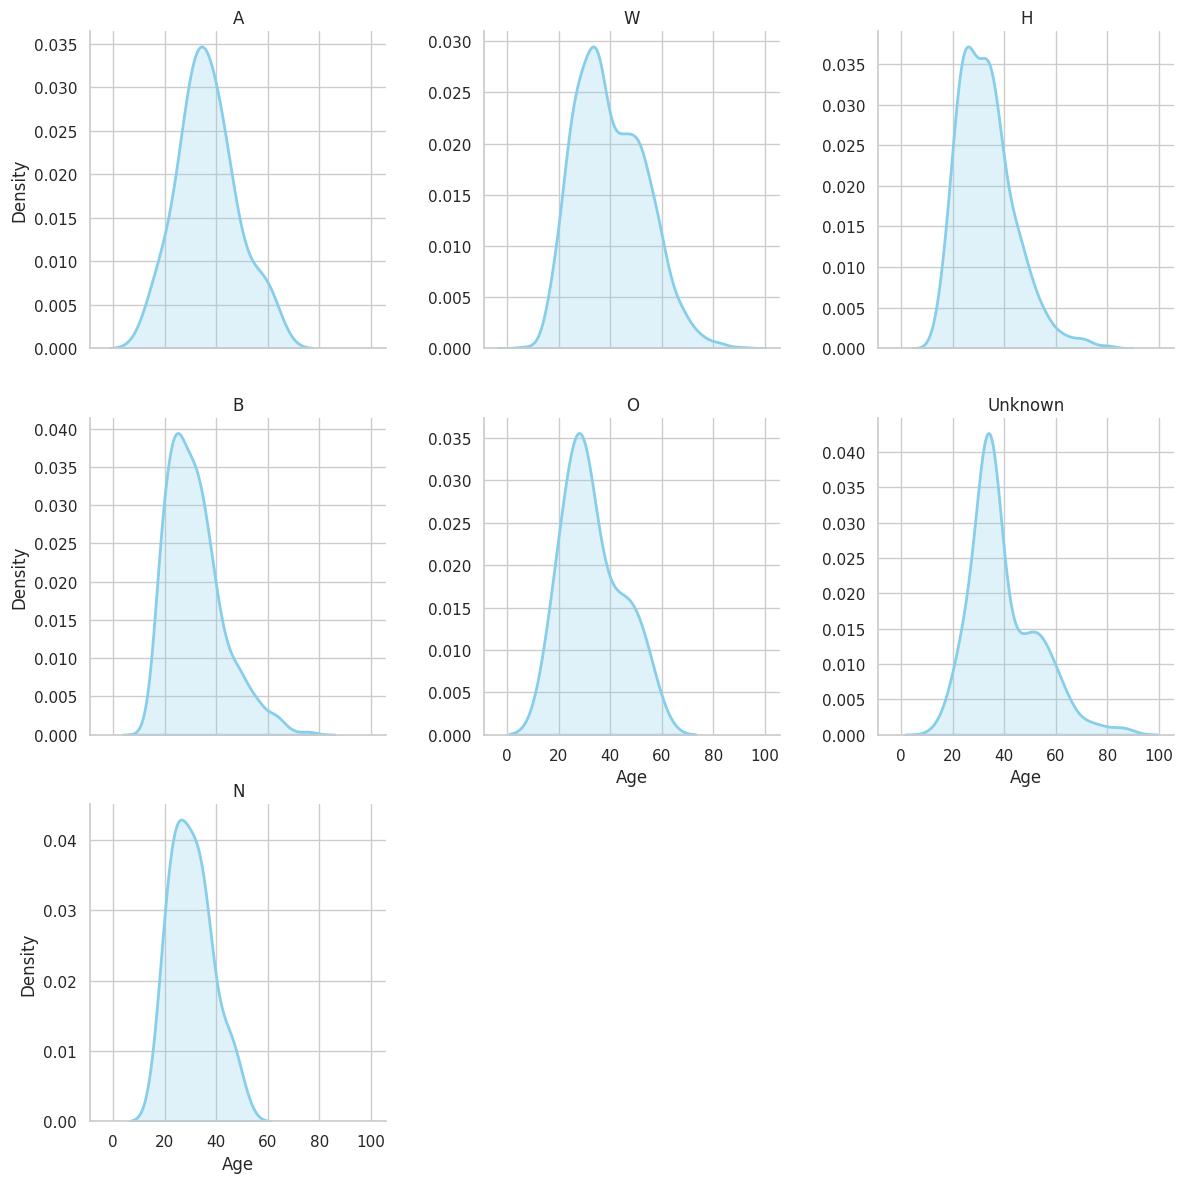

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4, sharey=False)

g.map(sns.kdeplot, 'age', color='skyblue', linewidth=2, fill=True)

g.set_axis_labels('Age', 'Density')
g.set_titles(col_template="{col_name}")

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

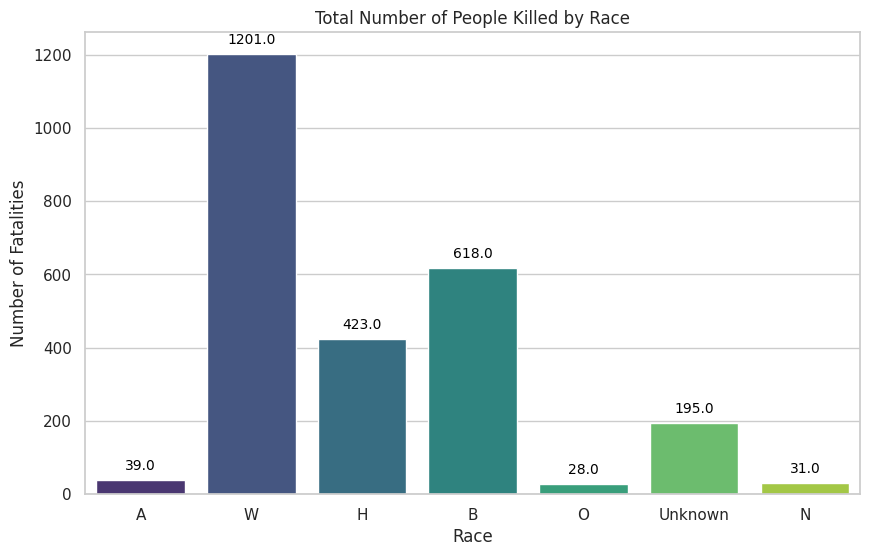

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='race', data=df_fatalities, palette='viridis', hue='race')

plt.xlabel('Race')
plt.ylabel('Number of Fatalities')
plt.title('Total Number of People Killed by Race')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
print("Percentage of people killed by police have been diagnosed with a mental illness: ", df_fatalities[df_fatalities['signs_of_mental_illness'] == True].shape[0] / df_fatalities.shape[0] * 100, "%")


Percentage of people killed by police have been diagnosed with a mental illness:  24.970414201183434 %


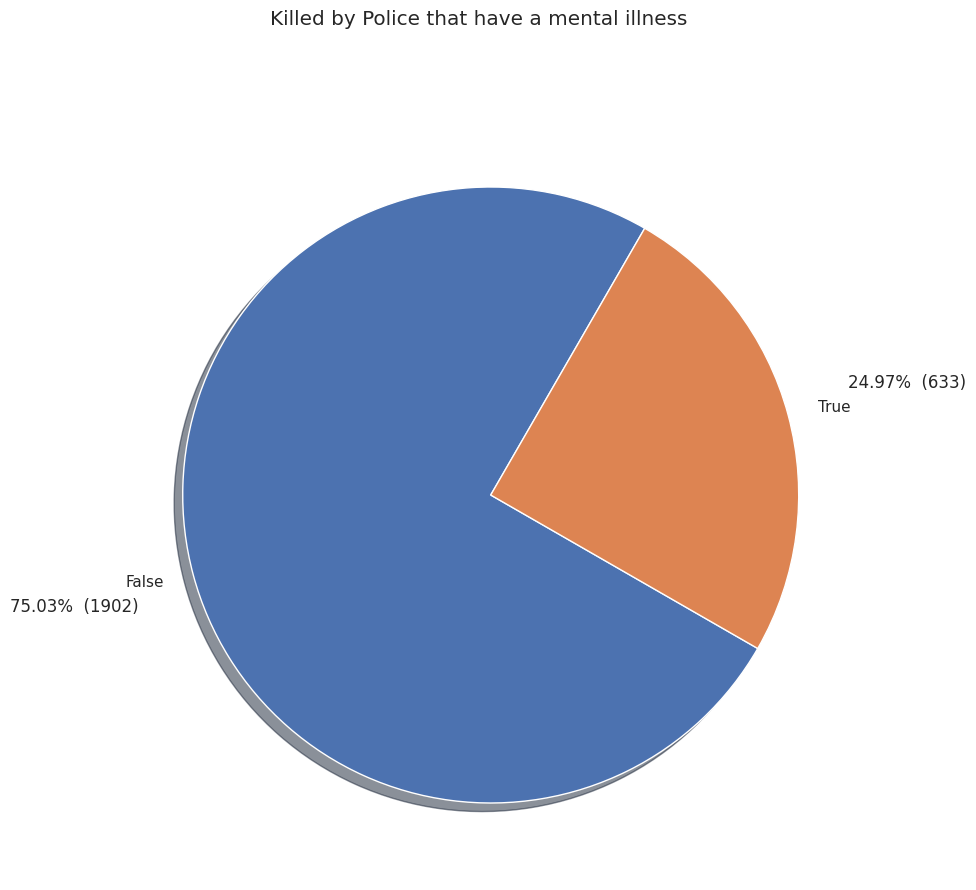

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct=make_autopct(mental), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:

top_cities = df_fatalities['city'].value_counts().nlargest(10)

<ipython-input-76-18e07a56c5b0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




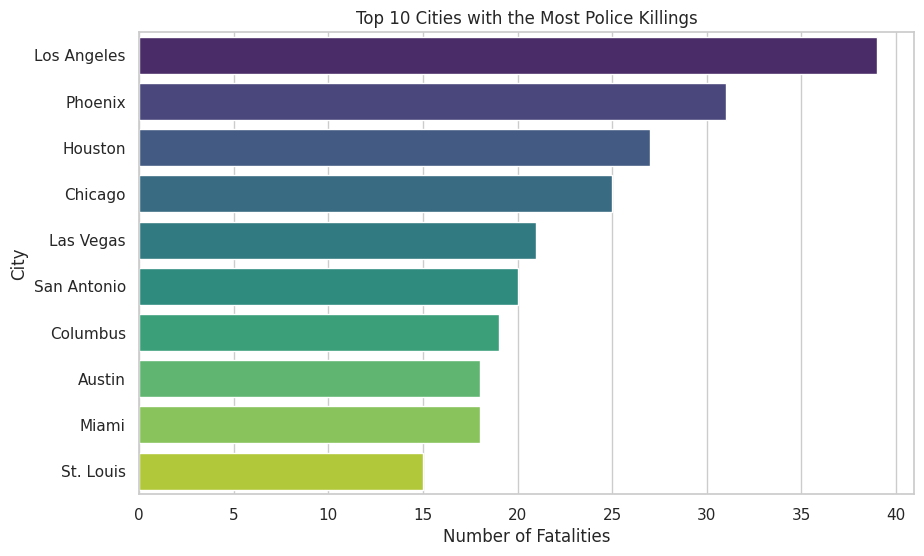

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')

plt.xlabel('Number of Fatalities')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Police Killings')

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
top_cities = df_fatalities['city'].value_counts().nlargest(10).index
df_top_cities = df_fatalities[df_fatalities['city'].isin(top_cities)]

In [ ]:
df_race_share = df_top_cities.groupby(['city', 'race']).size().unstack(fill_value=0)
df_race_share = df_race_share.div(df_race_share.sum(axis=1), axis=0) * 100

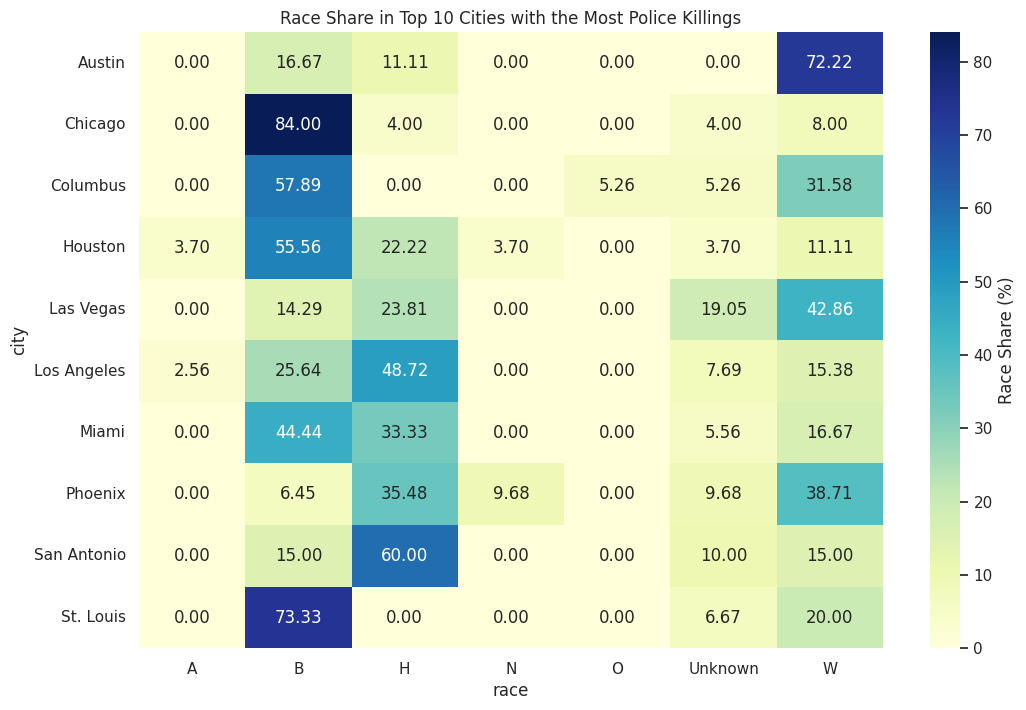

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_race_share, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Race Share (%)'})
plt.title('Race Share in Top 10 Cities with the Most Police Killings')
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
fatalities_by_state = df_fatalities["state"].value_counts().reset_index()
# fatalities_by_state = fatalities_by_state.sort_values(by="state", ascending=False) # No need to sort if we use 'state' column

# In px.choropleth, change locations='index' to locations='state'
fig = px.choropleth(
    data_frame=fatalities_by_state,
    locations='state',  # Use the 'state' column for locations
    locationmode="USA-states",
    scope="usa",
    color='count',  # Use the 'count' column for color scaling
    color_continuous_scale='matter',
    title='Police Killings by US State' # Add title to the chart
)

fig.show()

In [ ]:
# Create the df_pct_poverty_by_state DataFrame
df_pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
# Rename the 'Geographic Area' column to 'state' to match the choropleth requirement
df_pct_poverty_by_state.rename(columns={'Geographic Area': 'state'}, inplace=True)


fig = px.choropleth(
    data_frame=df_pct_poverty_by_state,
    locations='state',
    locationmode="USA-states",
    scope="usa",
    color='poverty_rate',
    color_continuous_scale='matter',
    title='<b>US Poverty Rate by State</b><br><i>Source: US Census Data</i>' # Add title with HTML for formatting
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

<ipython-input-105-5f5a8d37d238>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



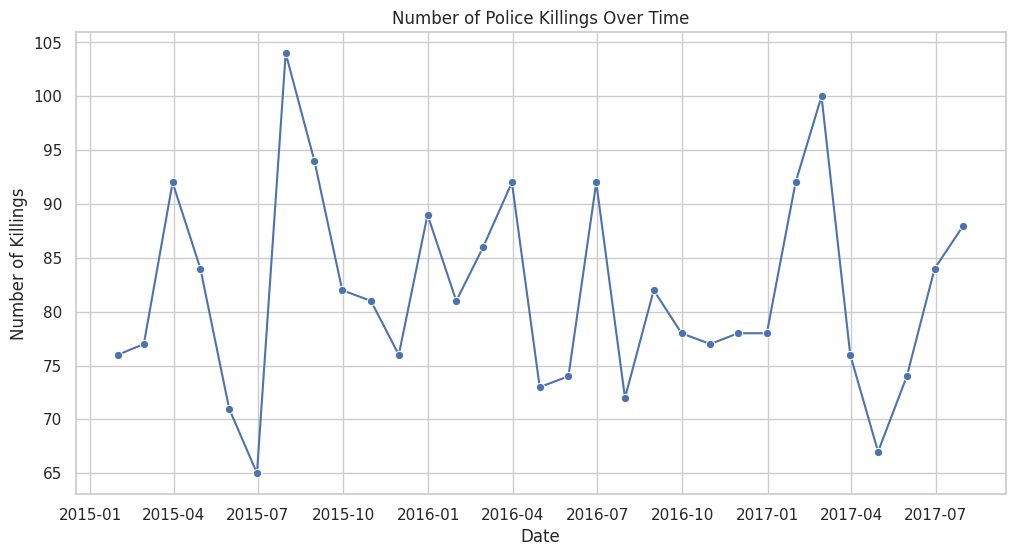

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'date' is the datetime column in your dataset
# The original format was likely '%m/%d/%y' or '%d/%m/%y'
# The error message indicates the format is likely '%d/%m/%y' (day/month/year)
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y') # Changed format to '%d/%m/%y'

# Group by the date and count the number of killings on each day
killings_over_time = df_fatalities.resample('M', on='date').size()

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=killings_over_time.index, y=killings_over_time.values, marker='o', color='b')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.show()

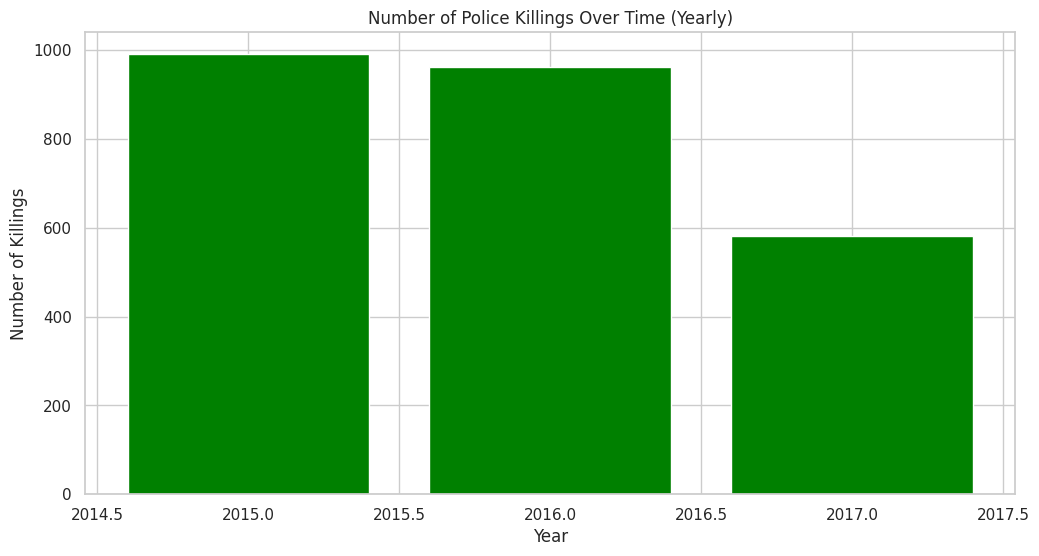

In [ ]:
df_fatalities['year'] = df_fatalities['date'].dt.year

killings_by_year = df_fatalities.groupby('year').size().reset_index(name='killings')

plt.figure(figsize=(12, 6))
plt.bar(killings_by_year['year'], killings_by_year['killings'], color='green')
plt.title('Number of Police Killings Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.show()

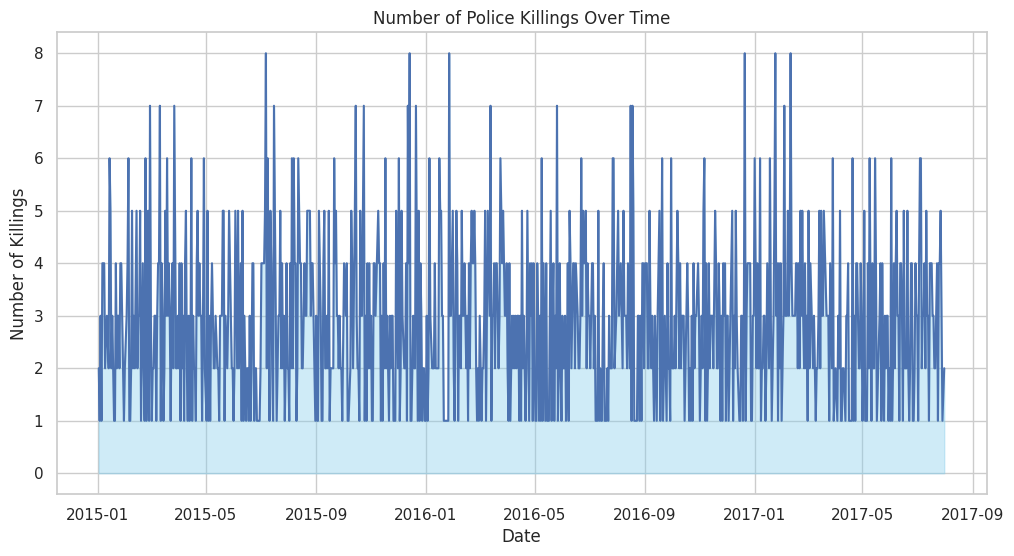

In [ ]:
killings_by_date = df_fatalities.groupby('date').size().reset_index(name='killings')

plt.figure(figsize=(12, 6))
plt.fill_between(killings_by_date['date'], killings_by_date['killings'], color='skyblue', alpha=0.4)
plt.plot(killings_by_date['date'], killings_by_date['killings'], marker='', linestyle='-', color='b')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.grid(True)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).